## $\color{Red}{Linear}$ $\color{Red}{Regression}$ $\color{Red}{Problem}$

**First we will make a linear regression model from scratch and compare it with the one implemented in scikit-learn**

**Importing relevant libraries**

**NumPy** to do vectorized numerical computations

**Pandas** to make dataframe of boston dataset

**Matplotlib** for plotting the data

from **scikit-learn** library we will import **Boston Housing price data**, **test train split** to divide the data in training part and testing part **Linear Regression model** and finally metrics **Mean absolute error**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE1

**We have already imported the dataset, now lets see the dataset**

As we can see, it conatins **506 rows** and **13 columns** and column names are given

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

In [ ]:
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


**Let's use pandas to convert the  data from array to dataframe and adding feature names to the data**

In [ ]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
#lets see the upper part of the data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Let's add the target (price) to the dataframe**

In [ ]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


Let's assign features into **X** and targets into **Y**

In [17]:
X = boston.data
Y = boston.target

split the dataset into training sets and testing sets

70 % of the data in training set and remaining of the 30 % is test dataset

In [18]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.3, random_state = 51)

**Now let's train the data**

In [36]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)
test_error = MAE1(Y_test, Y_pred)
print('Mean absolute Error is: ', test_error)

Mean absolute Error is:  3.469788454880869


**Let's get the parameters and plot the fitting**

In [37]:
print(LR.coef_)
print(LR.intercept_)

[-8.38017806e-02  2.84466293e-02  5.02885096e-02  1.67510613e+00
 -1.88777099e+01  3.98128050e+00  2.13924545e-02 -1.16925343e+00
  2.78696769e-01 -1.01612907e-02 -1.07985206e+00  9.03518532e-03
 -5.37737354e-01]
35.182235406742485


**Plot the results**

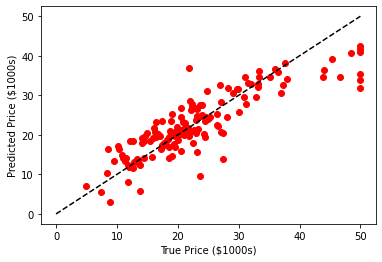

In [38]:
plt.figure(figsize=(6,4))
plt.xlabel('True Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)')
plt.plot([0, 50], [0, 50], '--k')
plt.scatter(Y_test, Y_pred, color='Red')